In [14]:
import grocery
import cv2
import numpy as np

Прочитаем изображение в `numpy.array` с помощью opencv:

In [15]:
img = cv2.imread('input.png')

С помощью функции `grocery.crop()` выполним кроп (1:1) изображения по центру:

In [16]:
img = grocery.crop(img)

По умолчанию `opencv` использует порядок каналов BGR. Модель принимает изображения с порядком RGB. Поменяем порядок каналов, сделаем ресайз и нормировку:

In [17]:
img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (224, 224)) / 255

Получим ответ от модели через функцию `grocery.predict()`, которая принимает на вход изображение - объект `numpy.array` размера `224x224x3`

In [18]:
%%time
prediction = grocery.predict(img)

CPU times: user 217 ms, sys: 10.9 ms, total: 228 ms
Wall time: 1.29 s


Функция возвращает объект `dict` с полями `output_class` и `output_mask`:

In [19]:
prediction.keys()

dict_keys(['output_mask', 'output_class'])

Для дальнейшего анализа рекомендуется работать с `prediction.output_mask`, который представляет собой структуру содержащую бинарные маски размеров `56х56` для каждого распознаваемого класса из списка `grocery.brands`. Для удобства ее можно перевести в объект `numpy.array`:

In [20]:
masks = np.array(prediction['output_mask'])

In [21]:
masks.shape

(56, 56, 58)

Также в `grocery` для демонстрации есть функция `segmentation_report()`, которая принимает на вход BGR-изображение - объект `numpy.array` размера `224x224x3`, выполняет всю необходимую постобработку и выводит на экран изображение с наложенными масками обнаруженных классов:

CPU times: user 310 ms, sys: 29.6 ms, total: 340 ms
Wall time: 1.58 s


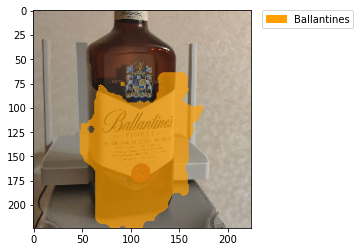

In [22]:
%%time
grocery.segmentation_report(img)